In [176]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn import metrics

from sklearn import neighbors

from sklearn import linear_model

In [177]:
data = pd.read_csv("VolumetricFeatures.csv")

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Columns: 141 entries, S.No to dataset
dtypes: float64(122), int64(19)
memory usage: 4.5 MB


In [179]:
data.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [180]:
data.tail()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
4221,4222,27065.6,532.4,12425.1,51042.9,6354.8,3822.6,4490.5,2019.4,1256.2,...,2.505,2.666,2.915,2.243,2.683,2.29264,1108782,1561822.106,79,9
4222,4223,28408.8,912.7,14024.8,43103.5,6060.7,3114.2,3731.0,1937.4,1669.9,...,2.385,3.008,3.572,2.040,2.866,2.30156,960586,1530179.480,79,9
4223,4224,34467.9,1659.6,12744.5,54924.8,6256.7,3573.4,3526.6,2189.9,3063.1,...,2.028,2.995,3.706,1.928,2.610,2.19622,1033357,1604323.353,84,9
4224,4225,31627.5,1334.4,15883.2,57148.2,6982.4,4475.8,4464.4,2317.8,3809.0,...,2.491,2.865,3.456,2.317,2.900,2.43580,1073339,1620891.799,80,9
4225,4226,14879.4,704.2,11346.6,50468.5,6935.4,3258.5,3751.5,2226.5,1898.4,...,2.474,3.150,3.691,2.337,2.787,2.43420,992086,1513076.040,86,9


In [181]:
data.describe()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000
mean,2113.500000,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,...,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586,4.533838
std,1220.085448,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,...,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099,3.057928
min,1.000000,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,...,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000,1.000000
25%,1057.250000,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,...,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000,1.000000
50%,2113.500000,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,...,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000,4.000000
75%,3169.750000,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,...,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000,8.000000
max,4226.000000,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,...,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000,9.000000


In [182]:
data.corr()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
S.No,1.000000,-0.273051,-0.297935,0.108163,0.228461,0.355100,0.218686,0.343462,0.213620,-0.323219,...,0.482818,0.367264,0.213806,0.343197,0.410412,0.551083,0.241622,-0.012108,-0.448086,0.966876
Left-Lateral-Ventricle,-0.273051,1.000000,0.758895,-0.185344,-0.115200,-0.339383,0.033166,-0.297033,-0.042405,0.758326,...,-0.450547,-0.258031,-0.236771,-0.346898,-0.399022,-0.473704,-0.143671,0.311918,0.569539,-0.269706
Left-Inf-Lat-Vent,-0.297935,0.758895,1.000000,-0.185624,-0.114728,-0.324770,-0.000890,-0.270332,-0.100457,0.639533,...,-0.432036,-0.280111,-0.298658,-0.313795,-0.388870,-0.460625,-0.178073,0.171763,0.496304,-0.289179
Left-Cerebellum-White-Matter,0.108163,-0.185344,-0.185624,1.000000,0.453275,0.552485,0.232840,0.363488,0.470753,-0.195800,...,0.228181,0.059456,0.129812,0.083770,0.196011,0.228483,0.573532,0.389334,-0.334077,0.114491
Left-Cerebellum-Cortex,0.228461,-0.115200,-0.114728,0.453275,1.000000,0.614980,0.406568,0.481604,0.453184,-0.131148,...,0.367147,0.095156,0.156303,0.262683,0.318206,0.383172,0.738842,0.584460,-0.471327,0.209924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rh_MeanThickness_thickness,0.551083,-0.473704,-0.460625,0.228483,0.383172,0.520636,0.329966,0.496941,0.241270,-0.507112,...,0.907426,0.534222,0.446643,0.671823,0.728960,1.000000,0.397472,0.056084,-0.706354,0.536616
BrainSegVolNotVent.2,0.241622,-0.143671,-0.178073,0.573532,0.738842,0.779632,0.511158,0.671049,0.646115,-0.159878,...,0.389036,0.095958,0.175485,0.231965,0.323182,0.397472,1.000000,0.786937,-0.530925,0.237614
eTIV.1,-0.012108,0.311918,0.171763,0.389334,0.584460,0.478718,0.445154,0.408873,0.541690,0.267492,...,0.083583,-0.092126,0.011810,0.039924,0.078768,0.056084,0.786937,1.000000,-0.109157,-0.019869
Age,-0.448086,0.569539,0.496304,-0.334077,-0.471327,-0.696598,-0.316839,-0.596201,-0.283967,0.616427,...,-0.665053,-0.343172,-0.257899,-0.481280,-0.547973,-0.706354,-0.530925,-0.109157,1.000000,-0.430217


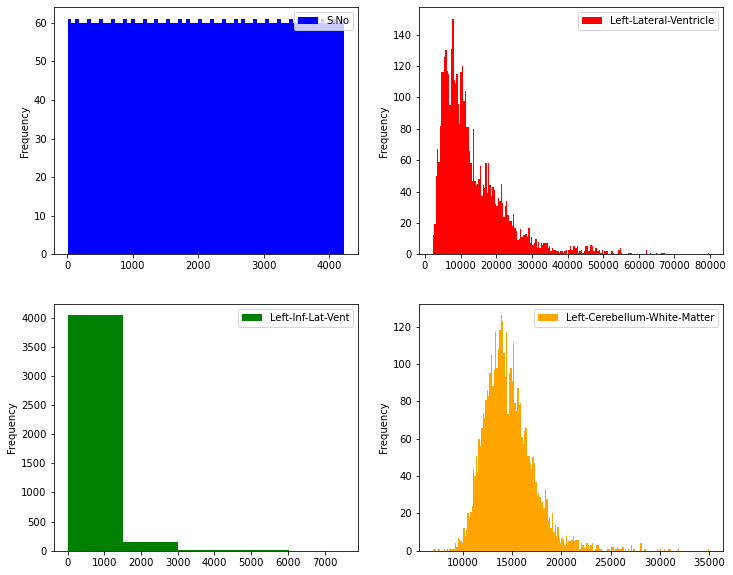

In [183]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
data.plot(kind="hist", y="S.No", bins=70, color="b", ax=axes[0][0])
data.plot(kind="hist", y="Left-Lateral-Ventricle", bins=200, color="r", ax=axes[0][1])
data.plot(kind="hist", y="Left-Inf-Lat-Vent", bins=5, color="g", ax=axes[1][0])
data.plot(kind="hist", y="Left-Cerebellum-White-Matter", bins=200, color="orange", ax=axes[1][1])
plt.show()

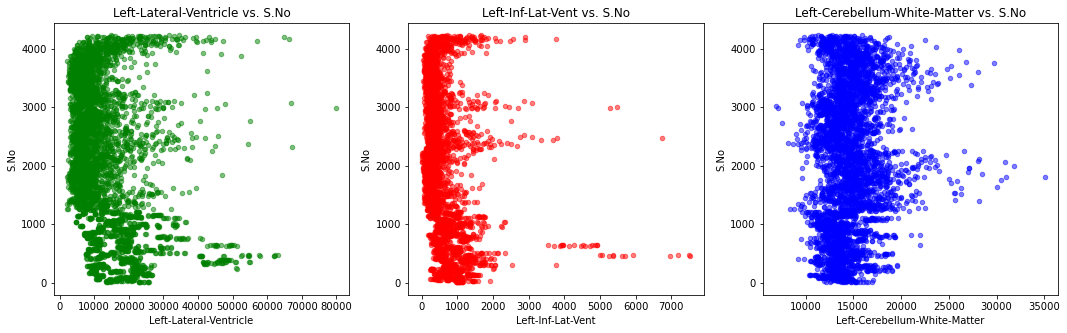

In [184]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
data.plot(kind='scatter', x='Left-Lateral-Ventricle', y='S.No', alpha=0.5, color='green', ax=axes[0], title="Left-Lateral-Ventricle vs. S.No")
data.plot(kind='scatter', x='Left-Inf-Lat-Vent', y='S.No', alpha=0.5, color='red', ax=axes[1], title="Left-Inf-Lat-Vent vs. S.No")
data.plot(kind='scatter', x='Left-Cerebellum-White-Matter', y='S.No', alpha=0.5, color='blue', ax=axes[2], title="Left-Cerebellum-White-Matter vs. S.No")
plt.show()

In [261]:
X = data.drop(["Age", "dataset", "S.No"], axis=1) 
y = data.Age.values

In [262]:
X

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1
0,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,1572.5,...,2.238,2.648,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965
1,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,1650.5,...,2.271,2.660,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130
2,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,1522.1,...,2.239,2.597,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518
3,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,1570.3,...,2.192,2.604,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236
4,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,1601.1,...,2.222,2.597,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,27065.6,532.4,12425.1,51042.9,6354.8,3822.6,4490.5,2019.4,1256.2,2037.6,...,2.093,2.457,2.505,2.666,2.915,2.243,2.683,2.29264,1108782,1561822.106
4222,28408.8,912.7,14024.8,43103.5,6060.7,3114.2,3731.0,1937.4,1669.9,2124.9,...,1.968,2.497,2.385,3.008,3.572,2.040,2.866,2.30156,960586,1530179.480
4223,34467.9,1659.6,12744.5,54924.8,6256.7,3573.4,3526.6,2189.9,3063.1,2511.9,...,1.982,2.407,2.028,2.995,3.706,1.928,2.610,2.19622,1033357,1604323.353
4224,31627.5,1334.4,15883.2,57148.2,6982.4,4475.8,4464.4,2317.8,3809.0,3133.5,...,2.359,2.700,2.491,2.865,3.456,2.317,2.900,2.43580,1073339,1620891.799


In [263]:
y

array([85, 85, 86, ..., 84, 80, 86])

In [264]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [265]:
from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [266]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_MLR_train = multiple_linear_reg.predict(x_train)
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training Accuracy for Multiple Linear Regression Model:  0.8598146160681905
Testing Accuracy for Multiple Linear Regression Model:  0.8540465165873202
RMSE for Training Data:  7.490973467992035
RMSE for Testing Data:  7.737212089700142


/Users/sofiegourlay/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

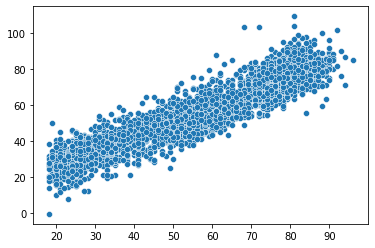

In [267]:
sns.scatterplot(y_train, y_pred_MLR_train)

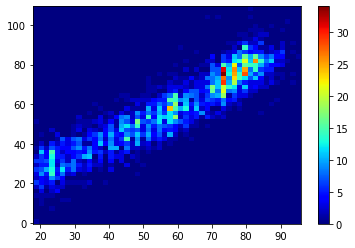

In [268]:
mean1 = [0, 0]
cov1 = [[1, 0.7], [0.7, 1]]

plt.hist2d(y_train, y_pred_MLR_train, (50, 50), cmap=plt.cm.jet)
plt.colorbar()

In [309]:
regr_1 = DecisionTreeRegressor(max_depth=200)
regr_2 = DecisionTreeRegressor(max_depth=50)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=50)

In [310]:
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)

r1_test = r2_score(y_test, y_1)
r2_test = r2_score(y_test, y_2)

print(r1_test)
print(r2_test)

0.7244697213396443
0.7362104789672727


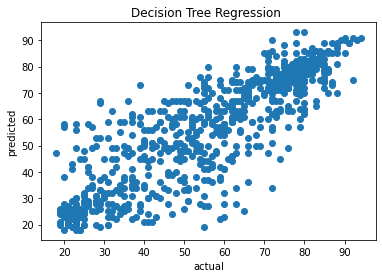

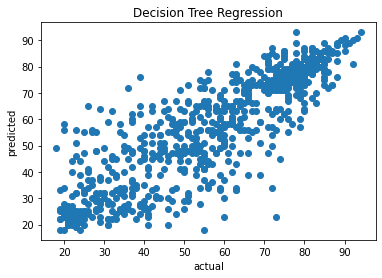

In [311]:
plt.figure()
plt.scatter(y_test, y_1)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("Decision Tree Regression ")
plt.show()

plt.figure()
plt.scatter(y_test, y_2)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("Decision Tree Regression")
plt.show()

#root mean square
#mean square
#mean absolute

0.7405890265112003
0.7491458597237842


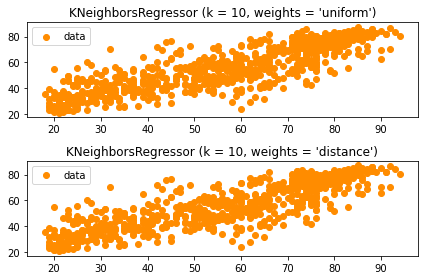

In [321]:
n_neighbors = 10

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    
    print(knn.score(x_test, y_test))

    plt.subplot(2, 1, i + 1)
    plt.scatter(y_test, y_predict, color="darkorange", label="data")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()